In [13]:
#Our first machine learning model
#Garreta and Moncecchi pp 10-20
#uses Iris database and SGD classifier
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.21.2.


In [14]:
from sklearn import datasets
iris = datasets.load_iris()

X_iris, y_iris = iris.data, iris.target

#(150, 4) (150,)
print( X_iris[0], y_iris[0])
#(150, 4) (150,)
#[ 5.1  3.5  1.4  0.2] 0

[5.1 3.5 1.4 0.2] 0


In [15]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris

# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)


In [16]:
#print( X_train.shape, y_train.shape)
#(112, 2) (112,)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

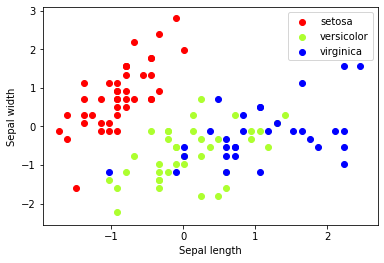

In [17]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [18]:

#found a typo here... incorrect from book followed by corrected code
#from sklearn.linear_modelsklearn._model import SGDClassifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

print( clf.coef_)
#[[-28.53692691 15.05517618]
#[ -8.93789454 -8.13185613]
#[ 14.02830747 -12.80739966]]
print( clf.intercept_)
#[-17.62477802 -2.35658325 -9.7570213 ]

[[-32.08251385  20.19180986]
 [  3.88778479 -10.2329038 ]
 [  9.07137627   2.76218507]]
[-18.61917858  -7.63122958  -2.55607667]


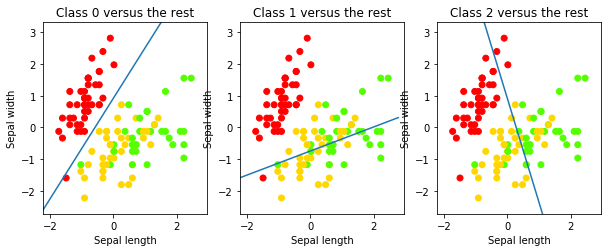

In [19]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#print(x_min)
#print(x_max)
#print(y_min,y_max)
#error in case Xs or xs
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    #prism: Red-yellow-green-blue-purple-...-green mode
    ys = (-clf.intercept_[i]-Xs * clf.coef_[i, 0])/clf.coef_[i, 1]
    #coef Regression coefficients
    plt.plot(Xs,ys)
    #plt.plot(xs,ys,hold=True)

In [20]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
#[0]

print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )
#[[ 19.73905808 8.13288449 -28.63499119]]


[0]
[[ 23.49475133 -13.39245333 -13.74811803]]


In [21]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )
#0.821428571429

y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )
#0.684210526316

print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )

0.7857142857142857
0.6578947368421053
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.33      0.18      0.24        11
   virginica       0.62      0.79      0.70        19

    accuracy                           0.66        38
   macro avg       0.65      0.66      0.64        38
weighted avg       0.62      0.66      0.63        38



In [22]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[ 8  0  0]
 [ 0  2  9]
 [ 0  4 15]]


In [23]:
#from sklearn.cross_validation import cross_val_score, KFold
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.pipeline import Pipeline
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([(
        'scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold cross validation iterator of k=5 folds
#cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
cv = KFold(5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print( scores )
#[ 0.66666667 0.93333333 0.66666667 0.7 0.6 ]

print("My name is chengye zhang")
print("My NetID is: chengye")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
######STOP HERE######################

[0.7        0.7        0.83333333 0.86666667 0.86666667]
My name is chengye zhang
My NetID is: chengye
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
